#Theoretical

1.What is Boosting in Machine Learning

In [ ]:
"""
Boosting is a machine learning technique that builds a powerful model by combining several simple models (usually decision trees).
 It trains these models one after another, with each new model focusing on the errors made by the ones before it. This process helps
  improve accuracy by reducing both bias and variance.
"""

2.How does Boosting differ from Bagging

In [ ]:
"""
Bagging builds several models independently and at the same time, then merges their outputs to improve accuracy — a common exampl
is Random Forest. In contrast, Boosting builds models one after another, where each new model aims to correct the mistakes made by
the previous ones — examples include AdaBoost and Gradient Boosting.
"""

3.What is the key idea behind AdaBoost

In [ ]:
"""
AdaBoost (Adaptive Boosting) works by giving different weights to training samples, increasing the weight of those that were
misclassified. It trains weak learners one after another, with each new model paying more attention to the errors made by
the previous ones.
"""

4.Explain the working of AdaBoost with an example

In [ ]:
"""
AdaBoost begins by fitting a simple (weak) classifier to the data. In each round, it increases the weights of the incorrectly
classified examples, making them more influential in training the next model. This cycle repeats, with each new model focusing
more on the hard-to-classify points. The final prediction is made by combining all the weak models, giving more weight to the more accurate ones.

Example: In a binary classification task, if a basic decision stump gets some samples wrong, those samples will carry more
weight in the next round, guiding the next stump to focus on them.
"""

5.What is Gradient Boosting, and how is it different from AdaBoost

In [ ]:
"""
Gradient Boosting also builds models one after another, but rather than changing sample weights like AdaBoost, it
improves performance by reducing the prediction errors (residuals) of the previous models. It does this using gradient
descent to minimize a loss function. While AdaBoost mainly targets misclassified examples, Gradient Boosting focuses
on correcting the numeric differences between actual and predicted values — making it especially effective for regression tasks.
"""

6.What is the loss function in Gradient Boosting

In [ ]:
"""
Gradient Boosting works by trying to reduce prediction errors from earlier models. It does this by building
new models that learn to predict the mistakes (residuals) of the existing ones, gradually improving accuracy.
The process aims to minimize a specific loss function, like Mean Squared Error for regression or Log Loss for
classification, using techniques like gradient descent.
"""

7.How does XGBoost improve over traditional Gradient Boosting

In [ ]:
"""
XGBoost (Extreme Gradient Boosting) enhances traditional Gradient Boosting with several powerful features:

- It includes L1 and L2 regularization to help prevent overfitting and improve model generalization.

- It can automatically manage missing values, so no need for manual imputation.

- It supports parallel processing, making training much faster than standard boosting methods.

- It uses efficient tree pruning, avoiding unnecessary splits and improving model performance.
"""

8.What is the difference between XGBoost and CatBoost

In [ ]:
"""
- XGBoost is a powerful and optimized version of Gradient Boosting designed to work well
  with structured/tabular data and deliver fast, accurate results.
- CatBoost is specially built to handle categorical (non-numeric) data effectively.
  It automatically converts categories into numbers and boosts performance without needing
  much manual preprocessing.
"""

9.What are some real-world applications of Boosting techniques

In [ ]:
"""
- Finance – Boosting methods help identify fraud and evaluate credit risk.
- Healthcare – Used for predicting diseases and assessing patient risk levels.
- Marketing – Applied to predict customer churn and power recommendation engines.
- Image Recognition – For example, AdaBoost is used in OpenCV for tasks like face detection.
"""

10.How does regularization help in XGBoost

In [ ]:
"""
-XGBoost applies L1 (Lasso) and L2 (Ridge) regularization techniques to reduce overfitting.
These regularizations add penalties for model complexity, helping the model stay simple and perform
 better on new, unseen data.
"""

11.What are some hyperparameters to tune in Gradient Boosting models

In [ ]:
"""
- Learning Rate (eta): Determines how much the model updates at each step — smaller values mean slower learning but better accuracy.
- Number of Estimators (n_estimators): Sets how many trees the model builds — more trees can improve performance but increase training time.
- Max Depth: Limits how deep each tree can grow — shallower trees help avoid overfitting.
- Subsample: Specifies the portion of the data to use for each tree — helps improve model generalization by adding randomness.
"""

12.What is the concept of Feature Importance in Boosting

In [ ]:
"""
- Boosting models measure feature importance based on how much each feature helps in minimizing prediction errors.
This makes it easier to understand which features are most valuable and supports better feature selection.
"""

13.Why is CatBoost efficient for categorical data

In [ ]:
"""
CatBoost is efficient for categorival data,because:
- Uses a special technique called Ordered Boosting to prevent data leakage during training
- Efficiently handles categorical features, so you don’t need to manually encode them
- Manages missing values automatically, making it reliable even with incomplete or messy data
"""

#Practical

In [1]:
#14.Train an AdaBoost Classifier on a sample dataset and print model accuracy

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic classification dataset
features, labels = make_classification(n_samples=500, n_features=5, random_state=42)

# Split the dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Initialize AdaBoost with Decision Stump as base estimator
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)

# Train the AdaBoost model
adaboost_model.fit(features_train, labels_train)

# Predict and evaluate
predictions = adaboost_model.predict(features_test)
print("AdaBoost Classifier Accuracy:", accuracy_score(labels_test, predictions))


AdaBoost Classifier Accuracy: 0.93


In [2]:
#15.Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Generate synthetic regression dataset
features, targets = make_regression(n_samples=400, n_features=4, noise=0.2, random_state=42)

# Split dataset into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Initialize AdaBoost Regressor with Decision Tree as base estimator
regressor = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=50,
    random_state=42
)

# Train the model
regressor.fit(features_train, targets_train)

# Predict and evaluate performance
predicted_values = regressor.predict(features_test)
print("AdaBoost Regressor MAE:", mean_absolute_error(targets_test, predicted_values))


AdaBoost Regressor MAE: 27.23116119869014


In [3]:
#16.Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
breast_cancer_data = load_breast_cancer()
features, targets = breast_cancer_data.data, breast_cancer_data.target

# Split the dataset into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(features_train, targets_train)

# Print the feature importances
print("Feature Importances:", gb_classifier.feature_importances_)


Feature Importances: [1.29234808e-05 2.78045836e-02 2.01183642e-04 4.25403304e-04
 2.46660446e-03 2.99604699e-03 9.22233287e-04 4.50527588e-01
 5.19940461e-04 1.06691601e-04 6.87020789e-03 3.60401381e-03
 1.15680237e-03 8.41527251e-03 5.56452892e-04 2.51063498e-03
 1.30679228e-02 2.03810848e-03 7.02862580e-04 4.22393330e-03
 7.55888752e-02 3.98864800e-02 5.14082111e-02 3.82446946e-02
 4.81083076e-03 4.50121585e-04 1.87249757e-02 2.40103086e-01
 1.47800843e-03 1.75306929e-04]


In [4]:
#17.Train a Gradient Boosting Regressor and evaluate using R-Squared Score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic regression dataset
features, targets = make_regression(n_samples=300, n_features=6, noise=0.3, random_state=42)

# Split dataset into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Initialize and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(features_train, targets_train)

# Make predictions and evaluate using R² score
predicted_targets = gb_regressor.predict(features_test)
print("Gradient Boosting R2 Score:", r2_score(targets_test, predicted_targets))


Gradient Boosting R2 Score: 0.9032347322366608


In [5]:
#18.Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
features, labels = make_classification(n_samples=500, n_features=6, random_state=42)

# Split dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Train XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(features_train, labels_train)

# Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(features_train, labels_train)

# Evaluate and compare model accuracy
xgb_accuracy = accuracy_score(labels_test, xgb_classifier.predict(features_test))
gb_accuracy = accuracy_score(labels_test, gb_classifier.predict(features_test))

# Print results
print("XGBoost Accuracy:", xgb_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)


XGBoost Accuracy: 0.91
Gradient Boosting Accuracy: 0.94


In [7]:
!pip install -q catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


In [9]:
#19.Train a CatBoost Classifier and evaluate using F1-Score

from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Generate synthetic classification dataset
features, labels = make_classification(n_samples=400, n_features=5, random_state=42)

# Split dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Initialize and train CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=100, verbose=0)
catboost_model.fit(features_train, labels_train)

# Make predictions and evaluate using F1 Score
predicted_labels = catboost_model.predict(features_test)
print("CatBoost F1 Score:", f1_score(labels_test, predicted_labels))


CatBoost F1 Score: 0.926829268292683


In [10]:
#20.Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic regression dataset
features, targets = make_regression(n_samples=350, n_features=4, noise=0.2, random_state=42)

# Split dataset into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Initialize and train XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(features_train, targets_train)

# Predict and evaluate using Mean Squared Error
predictions = xgb_regressor.predict(features_test)
print("XGBoost Regressor MSE:", mean_squared_error(targets_test, predictions))


XGBoost Regressor MSE: 174.3476966379117


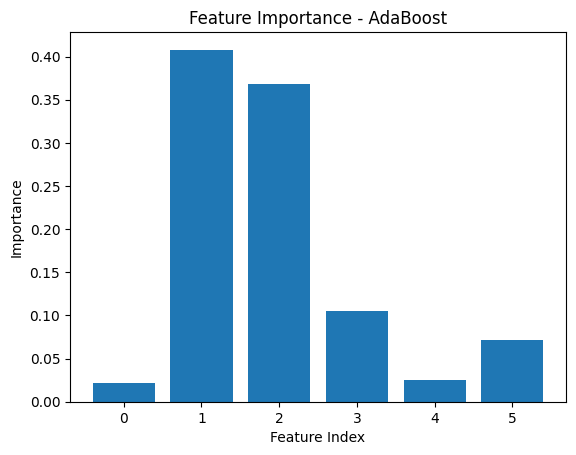

In [11]:
#21.Train an AdaBoost Classifier and visualize feature importance

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic classification dataset
features, labels = make_classification(n_samples=500, n_features=6, random_state=42)

# Split dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Initialize and train AdaBoost Classifier with decision stumps
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
adaboost_model.fit(features_train, labels_train)

# Plot feature importance
plt.bar(range(features.shape[1]), adaboost_model.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance - AdaBoost")
plt.show()


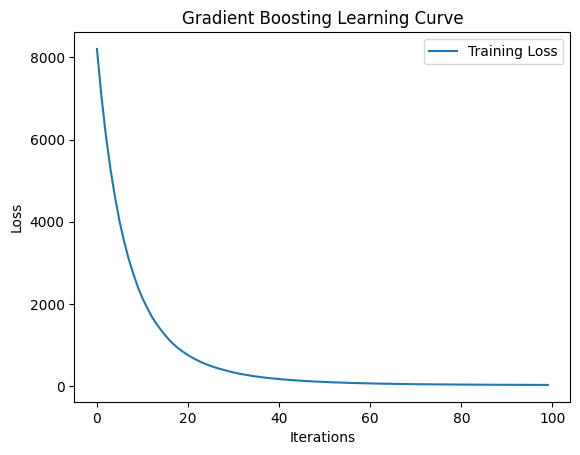

In [12]:
#22.Train a Gradient Boosting Regressor and plot learning curves

import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic regression dataset
features, targets = make_regression(n_samples=400, n_features=5, noise=0.3, random_state=42)

# Split dataset into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Initialize and train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(features_train, targets_train)

# Plot learning curve (training loss per iteration)
plt.plot(gbr_model.train_score_, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Gradient Boosting Learning Curve")
plt.legend()
plt.show()


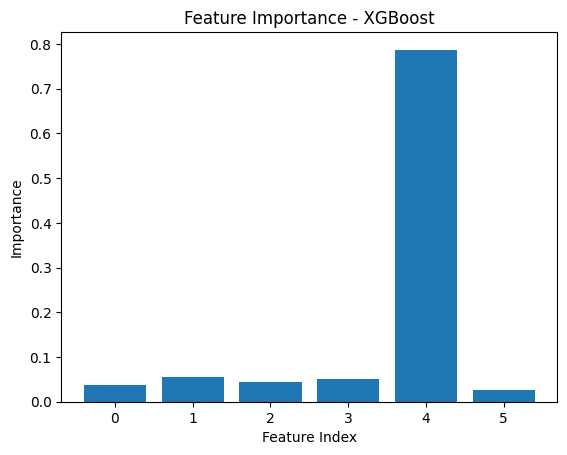

In [13]:
#23.Train an XGBoost Classifier and visualize feature importance

import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic classification dataset
features, labels = make_classification(n_samples=400, n_features=6, random_state=42)

# Split dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Initialize and train XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(features_train, labels_train)

# Plot feature importance
plt.bar(range(features.shape[1]), xgb_classifier.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance - XGBoost")
plt.show()


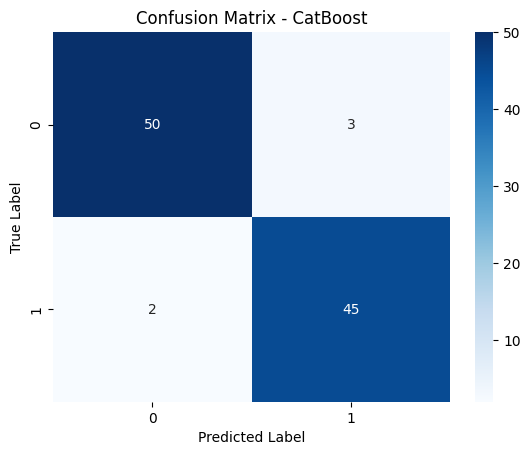

In [14]:
#24.Train a CatBoost Classifier and plot the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Generate synthetic classification dataset
features, labels = make_classification(n_samples=500, n_features=5, random_state=42)

# Split dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Train CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=100, verbose=0)
catboost_model.fit(features_train, labels_train)

# Make predictions
predicted_labels = catboost_model.predict(features_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(labels_test, predicted_labels)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CatBoost")
plt.show()


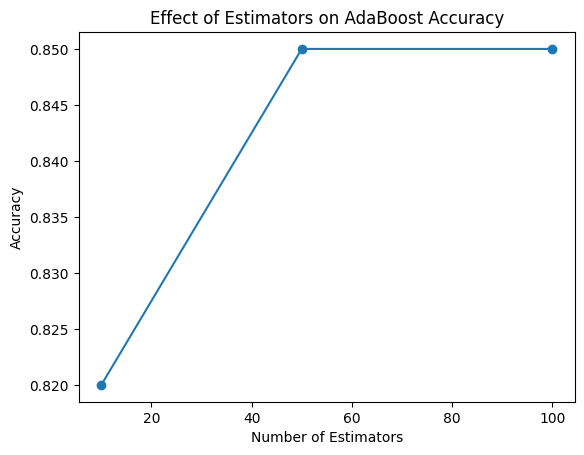

In [15]:
#25.Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic classification dataset
features, labels = make_classification(n_samples=500, n_features=6, random_state=42)

# Split dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Define different numbers of estimators to test
num_estimators_list = [10, 50, 100]
accuracy_scores = []

# Train AdaBoost models with different estimator counts
for estimator_count in num_estimators_list:
    ada_model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=estimator_count,
        random_state=42
    )
    ada_model.fit(features_train, labels_train)
    predicted_labels = ada_model.predict(features_test)
    accuracy = accuracy_score(labels_test, predicted_labels)
    accuracy_scores.append(accuracy)

# Plot number of estimators vs. accuracy
plt.plot(num_estimators_list, accuracy_scores, marker="o")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Effect of Estimators on AdaBoost Accuracy")
plt.show()


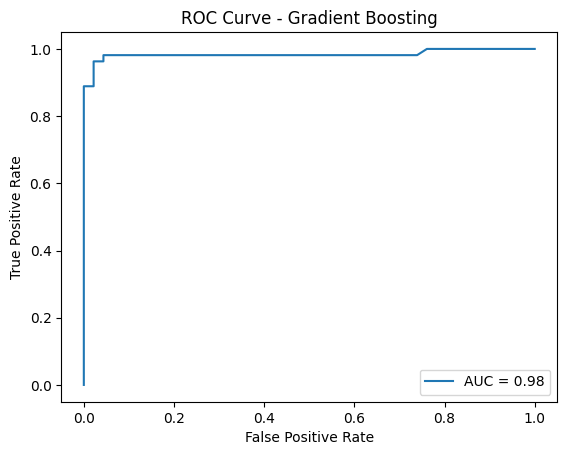

In [16]:
#26.Train a Gradient Boosting Classifier and visualize the ROC curve

import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Generate synthetic dataset
features, labels = make_classification(n_samples=500, n_features=6, random_state=42)

# Split dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(features_train, labels_train)

# Compute predicted probabilities for ROC curve
predicted_probabilities = gb_classifier.predict_proba(features_test)[:, 1]
false_positive_rate, true_positive_rate, _ = roc_curve(labels_test, predicted_probabilities)
roc_auc_score = auc(false_positive_rate, true_positive_rate)

# Plot ROC curve
plt.plot(false_positive_rate, true_positive_rate, label=f"AUC = {roc_auc_score:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.show()


In [17]:
#27.Train an XGBoost Regressor and tune the learning rate using GridSearchCV

from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV

# Generate synthetic regression dataset
features, targets = make_regression(n_samples=350, n_features=5, noise=0.2, random_state=42)

# Split dataset into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Define hyperparameter grid for tuning
hyperparameter_grid = {'learning_rate': [0.01, 0.1, 0.2]}

# Set up GridSearchCV with XGBRegressor
regressor_grid_search = GridSearchCV(
    XGBRegressor(n_estimators=100, random_state=42),
    hyperparameter_grid,
    cv=3
)

# Fit the model on training data
regressor_grid_search.fit(features_train, targets_train)

# Output best learning rate
print("Best Learning Rate:", regressor_grid_search.best_params_['learning_rate'])


Best Learning Rate: 0.2


In [18]:
#28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Generate imbalanced dataset
features, labels = make_classification(
    n_samples=1000, n_features=6, weights=[0.9, 0.1], random_state=42
)

# Split dataset
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Train CatBoost Classifier without class weights
catboost_model_plain = CatBoostClassifier(iterations=100, verbose=0)
catboost_model_plain.fit(features_train, labels_train)
predictions_plain = catboost_model_plain.predict(features_test)

# Train CatBoost Classifier with class weights
catboost_model_weighted = CatBoostClassifier(iterations=100, class_weights=[1, 10], verbose=0)
catboost_model_weighted.fit(features_train, labels_train)
predictions_weighted = catboost_model_weighted.predict(features_test)

# Compare F1-Scores
print("CatBoost F1 Score (No Class Weights):", f1_score(labels_test, predictions_plain))
print("CatBoost F1 Score (With Class Weights):", f1_score(labels_test, predictions_weighted))


CatBoost F1 Score (No Class Weights): 0.75
CatBoost F1 Score (With Class Weights): 0.6842105263157895


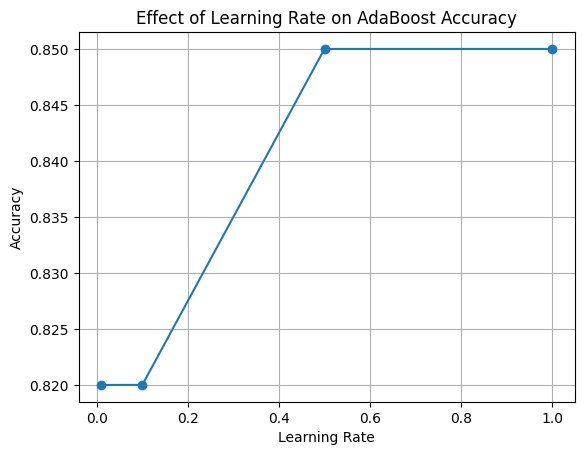

In [19]:
#29.Train an AdaBoost Classifier and analyze the effect of different learning rates

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic classification dataset
features, targets = make_classification(n_samples=500, n_features=6, random_state=42)

# Split dataset into training and test sets
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Evaluate AdaBoost performance across different learning rates
rate_list = [0.01, 0.1, 0.5, 1.0]
accuracy_scores = []

for rate in rate_list:
    adaboost_model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        learning_rate=rate,
        random_state=42
    )
    adaboost_model.fit(features_train, targets_train)
    predictions = adaboost_model.predict(features_test)
    accuracy = accuracy_score(targets_test, predictions)
    accuracy_scores.append(accuracy)

# Plot learning rate vs. accuracy
plt.plot(rate_list, accuracy_scores, marker="o")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Effect of Learning Rate on AdaBoost Accuracy")
plt.grid(True)
plt.show()


In [20]:
#30.Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Generate synthetic multi-class classification dataset
features, labels = make_classification(
    n_samples=600,
    n_features=6,
    n_classes=3,
    n_informative=4,
    random_state=42
)

# Split dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Train XGBoost classifier for multi-class classification
xgb_model = XGBClassifier(n_estimators=100, objective="multi:softprob", random_state=42)
xgb_model.fit(features_train, labels_train)

# Predict class probabilities and compute log loss
predicted_probabilities = xgb_model.predict_proba(features_test)
print("XGBoost Log Loss:", log_loss(labels_test, predicted_probabilities))


XGBoost Log Loss: 0.35812071647553145
